# Gold ETFs Price Forecast, Trends, & 2 Year Predictions

## Analysis
This exercise analyses SPDR® Gold Shares (NYSE Arca : GLD). Prices of this share was downloaded from Yahoo Finance. 
Data spans from the inception of this share from 11/18/2004 to the date of download, 11/22/2019.

## Techniques Used
- EDA and visualize data
- Fill missing data
- Check If Time Series Data is Stationary using Dicky-Fuller Test
- Make the Time Series Data Stationary
- Use ACF and PACF to Choose the Model Order (AR, MA, ARMA)
- Use AIC and BIC Results to Pick the Optimal Model Order¶
- ARIMA Model with No Seasonality & One-Step Ahead Forecast
- Auto ARIMA Model with Seasonality & One-Step Ahead Forecast
- ARIMA Model with Seasonality & One-Step Ahead Forecast - Manual Grid Search
- Forecast using Training Data and Compare with the Test Data
- Conclusion using ARIMA
- Use Facebook Prophet to Make Forecast
- Compare results between ARIMA and Prophet
- Use ARIMA and Prophet to forecast out 5 years for gold prices

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from pandas import DataFrame
import itertools
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from math import sqrt
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error

# Analysis imports
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima
from fbprophet import Prophet

import warnings
warnings.filterwarnings('ignore') #this would remove any deprecated warning

# Exploratory Data Analysis
- Load GLD All-Time Historical Dataset & Perform Some Analysis
- SPDR® Gold Shares (NYSE Arca : GLD) - a cost-effective and convenient way to invest in gold

In [115]:
data_gld = pd.read_csv('data/gld.csv')
print("GLD Data: " + str(data_gld.shape))
data_gld.head(20)

GLD Data: (3780, 7)


Date       Open       High        Low      Close  Adj Close  \
0   2004-11-18  44.430000  44.490002  44.070000  44.380001  44.380001   
1   2004-11-19  44.490002  44.919998  44.470001  44.779999  44.779999   
2   2004-11-22  44.750000  44.970001  44.740002  44.950001  44.950001   
3   2004-11-23  44.880001  44.919998  44.720001  44.750000  44.750000   
4   2004-11-24  44.930000  45.049999  44.790001  45.049999  45.049999   
5   2004-11-26  45.250000  45.599998  45.060001  45.290001  45.290001   
6   2004-11-29  45.099998  45.500000  45.080002  45.400002  45.400002   
7   2004-11-30  45.369999  45.410000  44.820000  45.119999  45.119999   
8   2004-12-01  45.279999  45.590000  45.259998  45.380001  45.380001   
9   2004-12-02  45.549999  45.570000  44.680000  44.950001  44.950001   
10  2004-12-03  45.040001  46.000000  44.799999  45.599998  45.599998   
11  2004-12-06  45.389999  45.470001  45.110001  45.169998  45.169998   
12  2004-12-07  45.299999  45.320000  45.070000  45.110001  45.110001   
13  2004-12-08  43.799999  44.020000  43.360001  44.009998  44.009998   
14  2004-12-09  43.750000  43.900002  43.200001  43.779999  43.779999   
15  2004-12-10  43.369999  43.599998  43.310001  43.439999  43.439999   
16  2004-12-13  43.610001  44.009998  43.509998  43.910000  43.910000   
17  2004-12-14  43.759998  43.799999  43.509998  43.549999  43.549999   
18  2004-12-15  44.099998  44.169998  43.919998  43.990002  43.990002   
19  2004-12-16  43.990002  44.049999  43.580002  43.680000  43.680000   

      Volume  
0    5992000  
1   11655300  
2   11996000  
3    3169200  
4    6105100  
5    3097700  
6    3759000  
7    3857200  
8    2037500  
9    6457800  
10   4218300  
11   3102400  
12   3797300  
13   6148600  
14   3553400  
15   2464300  
16   1445100  
17   2240600  
18   2641400  
19   3269800

In [5]:
data_gld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3780 entries, 0 to 3779
Data columns (total 7 columns):
Date         3780 non-null object
Open         3780 non-null float64
High         3780 non-null float64
Low          3780 non-null float64
Close        3780 non-null float64
Adj Close    3780 non-null float64
Volume       3780 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 206.8+ KB


In [6]:
data_gld.describe()

Open         High          Low        Close    Adj Close  \
count  3780.000000  3780.000000  3780.000000  3780.000000  3780.000000   
mean    109.298553   109.854220   108.700423   109.297146   109.297146   
std      33.461304    33.575604    33.326566    33.458163    33.458163   
min      41.029999    41.360001    41.020000    41.259998    41.259998   
25%      87.362501    88.407503    86.715000    87.419998    87.419998   
50%     117.024998   117.444999   116.420002   116.985000   116.985000   
75%     127.002500   127.532500   126.432501   127.127503   127.127503   
max     184.580002   185.850006   182.100006   184.589996   184.589996   

             Volume  
count  3.780000e+03  
mean   9.677284e+06  
std    7.196708e+06  
min    3.193000e+05  
25%    5.089775e+06  
50%    7.992400e+06  
75%    1.205778e+07  
max    9.380420e+07

In [7]:
print("Dataframe contains GLD Data from from " + str(data_gld['Date'].min()) + " to " + str(data_gld['Date'].max()))

Dataframe contains GLD Data from from 2004-11-18 to 2019-11-22


# EDA Conclusion
- there are missing data, e.g. stock prices are missing on non-trading days like weekends and holidays
- we are going to resample the dates and use forward fill to fill the missing values in the dataframe

In [120]:
# Read in csv file and parse date as datetime
dateparser = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
ffill_data = pd.read_csv('data/gld.csv', parse_dates=['Date'], date_parser=dateparser)
print("GLD Data Before Forward Fill: " + str(ffill_data.shape))


cols = ffill_data.columns #store original column names
ffill_data.set_index("Date", inplace=True)
ffill_data.head(10)

GLD Data Before Forward Fill: (3780, 7)


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2004-11-18  44.430000  44.490002  44.070000  44.380001  44.380001   5992000
2004-11-19  44.490002  44.919998  44.470001  44.779999  44.779999  11655300
2004-11-22  44.750000  44.970001  44.740002  44.950001  44.950001  11996000
2004-11-23  44.880001  44.919998  44.720001  44.750000  44.750000   3169200
2004-11-24  44.930000  45.049999  44.790001  45.049999  45.049999   6105100
2004-11-26  45.250000  45.599998  45.060001  45.290001  45.290001   3097700
2004-11-29  45.099998  45.500000  45.080002  45.400002  45.400002   3759000
2004-11-30  45.369999  45.410000  44.820000  45.119999  45.119999   3857200
2004-12-01  45.279999  45.590000  45.259998  45.380001  45.380001   2037500
2004-12-02  45.549999  45.570000  44.680000  44.950001  44.950001   6457800

In [121]:
# Resample dates and forward fill missing values with previous values
ffill_data = ffill_data.resample("D").ffill().reset_index()

In [123]:
print("GLD Data After Forward Fill: " + str(ffill_data.shape))
ffill_data.head(10)

GLD Data After Forward Fill: (5483, 7)


Date       Open       High        Low      Close  Adj Close    Volume
0 2004-11-18  44.430000  44.490002  44.070000  44.380001  44.380001   5992000
1 2004-11-19  44.490002  44.919998  44.470001  44.779999  44.779999  11655300
2 2004-11-20  44.490002  44.919998  44.470001  44.779999  44.779999  11655300
3 2004-11-21  44.490002  44.919998  44.470001  44.779999  44.779999  11655300
4 2004-11-22  44.750000  44.970001  44.740002  44.950001  44.950001  11996000
5 2004-11-23  44.880001  44.919998  44.720001  44.750000  44.750000   3169200
6 2004-11-24  44.930000  45.049999  44.790001  45.049999  45.049999   6105100
7 2004-11-25  44.930000  45.049999  44.790001  45.049999  45.049999   6105100
8 2004-11-26  45.250000  45.599998  45.060001  45.290001  45.290001   3097700
9 2004-11-27  45.250000  45.599998  45.060001  45.290001  45.290001   3097700

In [124]:
# Sort by date in ascending order & export to new csv file
ffill_data = ffill_data[cols] #revert column order
ffill_data.sort_values(by='Date', inplace=True)
ffill_data.to_csv('data/gld-nomissing.csv', index=False)

# EDA Conclusion
- the original csv file used to have 3780 rows of data. After filling the missing dates, we now have 5483 rows of data.

# Visualize The Data

In [127]:
# Read in the gld prices file with no missing data
# Convert the date column from string to date and make it the index
dateparser = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('data/gld-nomissing.csv', index_col='Date', parse_dates=['Date'], date_parser=dateparser)
print("GLD Prices for All Days, including weekends and holidays: " + str(data.shape))
data.head()

GLD Prices for All Days, including weekends and holidays: (5483, 6)


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2004-11-18  44.430000  44.490002  44.070000  44.380001  44.380001   5992000
2004-11-19  44.490002  44.919998  44.470001  44.779999  44.779999  11655300
2004-11-20  44.490002  44.919998  44.470001  44.779999  44.779999  11655300
2004-11-21  44.490002  44.919998  44.470001  44.779999  44.779999  11655300
2004-11-22  44.750000  44.970001  44.740002  44.950001  44.950001  11996000

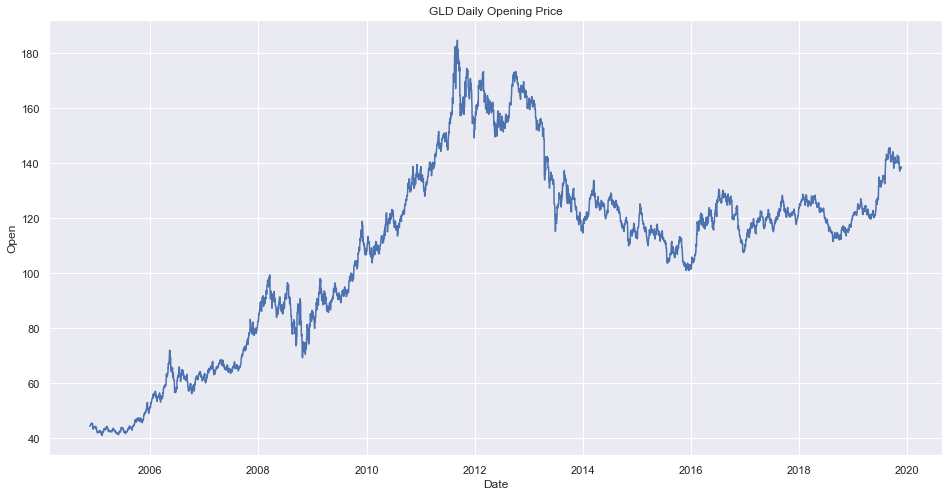

In [128]:
sns.set(style="darkgrid")
plt.figure(figsize=(16,8))
sns.lineplot(x=data.index, y='Open', data=data, linewidth=1.5).set_title('GLD Daily Opening Price')
plt.show()

# Check If Time Series Data is Stationary
Data needs to be stationary before modeling. Run Dicky-Fuller test on the Open Price

In [129]:
adfuller_result = adfuller(data['Open'])
print('ADF Statistic: ', adfuller_result[0])
print('p-value: ', adfuller_result[1])

ADF Statistic:  -1.8025174981713052
p-value:  0.3792125439071432


### Conclusion: The data is not stationary because the p-value is greater than 0.05

# Make the Time Series Data Stationary
Use the difference method, square root and take the difference twice method to see which is a best way to make the data stationary

In [130]:
# Diff Method
data_diff = data.diff().dropna()
diff_adfuller_result = adfuller(data_diff['Open'])
print('Difference Method ADF Statistic: ', diff_adfuller_result[0])
print('Difference Method p-value: ', diff_adfuller_result[1])

Difference Method ADF Statistic:  -16.738250093306753
Difference Method p-value:  1.3650617859601889e-29


In [131]:
data_sqrt = np.sqrt(data).dropna()
sqrt_adfuller_result = adfuller(data_sqrt['Open'])
print('Square Root Method ADF Statistic: ', sqrt_adfuller_result[0])
print('Square Root Methodp-value: ', sqrt_adfuller_result[1])

Square Root Method ADF Statistic:  -2.0279705213801678
Square Root Methodp-value:  0.27444523490828154


In [132]:
# Diff Twice Method
data_difftwice = data.diff().diff().dropna()
difftwice_adfuller_result = adfuller(data_difftwice['Open'])
print('Difference Method ADF Statistic: ', difftwice_adfuller_result[0])
print('Difference Method p-value: ', difftwice_adfuller_result[1])

Difference Method ADF Statistic:  -21.13672510562556
Difference Method p-value:  0.0


### Conclusion
The Square Root methods didn't produce a p-value less than 0.05. So we should eliminate it. Both Differencing once and twice methods produced a p-value less than 0.05 but Differencing Twice produced a much more negative ADF Statistic. That's what we want, the more negative the better.

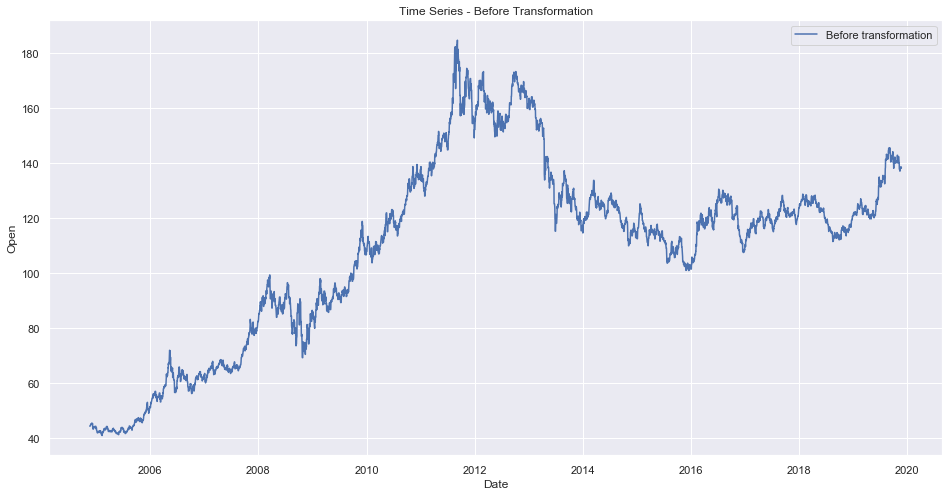

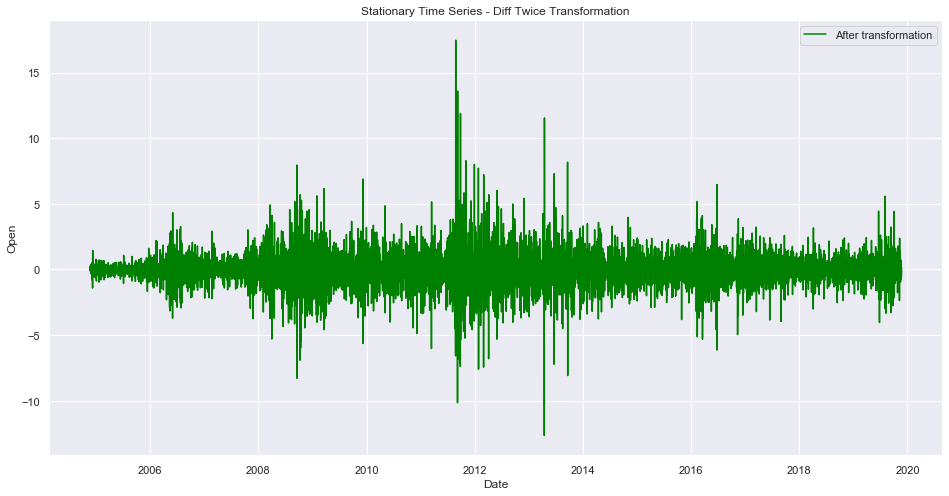

In [135]:
# Plot the time series before transformation
plt.figure(figsize=(16,8))
sns.lineplot(x=data.index, y='Open', data=data, linewidth=1.5, label='Before transformation').set_title('Time Series - Before Transformation')
plt.show()

# Plot the time series after transformation
plt.figure(figsize=(16,8))
sns.lineplot(x=data_difftwice.index, y='Open', data=data_difftwice, label='After transformation', color='green').set_title('Stationary Time Series - Diff Twice Transformation')
plt.show()

# Which Model - AR, MA or ARMA. Use ACF and PACF to Choose the Model Order

**ACF** - Autocorrelation function to help select the right order.

**PACF** - Partial Autocorrelation is the correlation between the time series and the lag version of itself after we subtract the effect of correlation at smaller lags.So, it’s just the correlation associated with just that particular lag

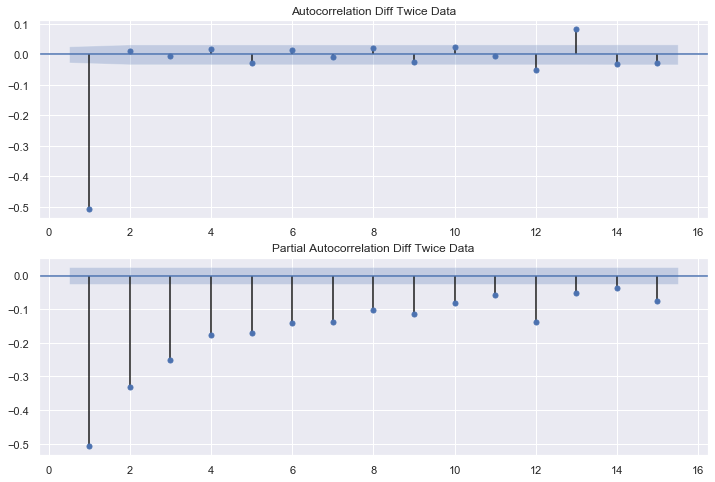

In [136]:
# Plot ACF and PACF with stationary data using data that was differenced twice

fig_difftwice, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF of data_difftwice
plot_acf(data_difftwice['Open'], lags=15, zero=False, ax=ax1, title='Autocorrelation Diff Twice Data')

# Plot PACF of data_difftwice
plot_pacf(data_difftwice['Open'], lags=15, zero=False, ax=ax2, title='Partial Autocorrelation Diff Twice Data')

plt.show()

### Initial Observation
**ACF** - Cuts off after lag 1

**PACF** - tails off

**Initial conclusion:** It may be a MA(1) model.

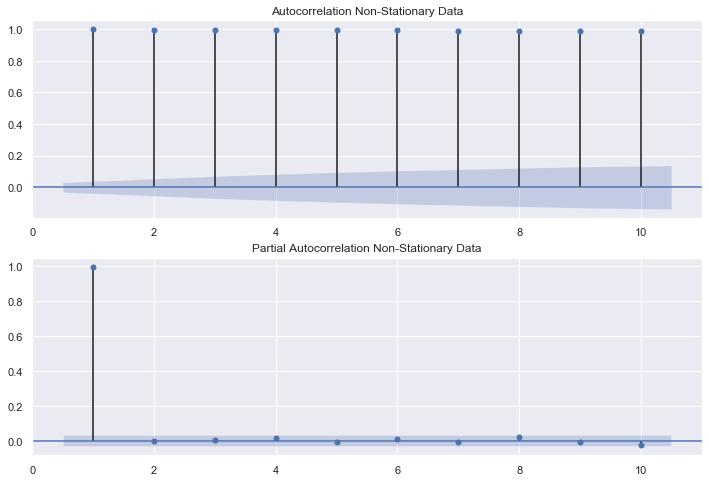

In [137]:
# Plot ACF and PACF with non-stationary data just to see how different they are compared to the stationary data

fig_data_gld, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# Plot ACF of data_difftwice
plot_acf(data_gld['Open'], lags=10, zero=False, ax=ax1, title='Autocorrelation Non-Stationary Data')

# Plot PACF of data_difftwice
plot_pacf(data_gld['Open'], lags=10, zero=False, ax=ax2, title='Partial Autocorrelation Non-Stationary Data')

plt.show()

# Conclusion
The **ACF** cuts off after lag 1 and the **PACF** tails off. This may indicate that a Moving Average Model with an order of 1 MA(1) might be the best. However, there are limitations to the ACF and PACF method. We are making the judgement based on how the ACF and PACF graphs look. Sometimes it may not be as clear to make a conclusion. 

Next, let's use a different method to pick the optimal model order - the AIC and BIC.

# Which Model - AR, MA or ARMA. Use AIC and BIC Results to Pick the Optimal Model Order

**Akaike Information Criterion (AIC)**
- Lower AIC indicates a better model
- AIC is ideal for simple models with lower order


**Bayesian Information Criterion (BIC)**
- Lower BIC indicates a better model
- BIC penalizes complex models

Most of the times, AIC and BIC will select the same model order. However, when they don't, we have to make a choice which to pick:
- AIC - better at choosing predictive models (use this if that’s our goal)
- BIC - better at choosing good explanatory model (use this if that’s our goal)



In [139]:
# Search for the ideal model order
order_aic_bic = []

# Loop over AR order
for p in range(3):
    # Loop over MA order
    for q in range(3):
        try:
            # Fit model
            model = SARIMAX(data_difftwice['Open'], order=(p,0,q))
            results = model.fit()
            # Store the model order and the AIC/BIC values in order_aic_bic list
            order_aic_bic.append((p, q, results.aic, results.bic))
            #print(p, q, results.aic, results.bic)
        except:
            # Print AIC and BIC as None when fails
            print(p, q, None, None)

In [140]:
# Make a dataframe of model order using AIC/BIC scores
aic_bic_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'aic', 'bic'])
print(aic_bic_df)

   p  q           aic           bic
0  0  0  19683.644070  19690.253113
1  0  1  15870.084038  15883.302124
2  0  2  15871.949100  15891.776229
3  1  0  18053.677637  18066.895723
4  1  1  15871.977921  15891.805050
5  1  2  15873.984951  15900.421122
6  2  0  17419.185255  17439.012384
7  2  1  15873.328543  15899.764715
8  2  2  15875.843240  15908.888454


In [141]:
# Sort by AIC
print(aic_bic_df.sort_values('aic'))

   p  q           aic           bic
1  0  1  15870.084038  15883.302124
2  0  2  15871.949100  15891.776229
4  1  1  15871.977921  15891.805050
7  2  1  15873.328543  15899.764715
5  1  2  15873.984951  15900.421122
8  2  2  15875.843240  15908.888454
6  2  0  17419.185255  17439.012384
3  1  0  18053.677637  18066.895723
0  0  0  19683.644070  19690.253113


In [142]:
# Sort by BIC
print(aic_bic_df.sort_values('bic'))

   p  q           aic           bic
1  0  1  15870.084038  15883.302124
2  0  2  15871.949100  15891.776229
4  1  1  15871.977921  15891.805050
7  2  1  15873.328543  15899.764715
5  1  2  15873.984951  15900.421122
8  2  2  15875.843240  15908.888454
6  2  0  17419.185255  17439.012384
3  1  0  18053.677637  18066.895723
0  0  0  19683.644070  19690.253113


# Conclusion: Both AIC and BIC selected the same p and q values of 0, 1.
This is the same results as the ACF and PACF analysis where we determined it was a MA(1) model order.

# Train-test Split
There are 15 years of data. We are going to use the first 12 years (2004 - 2016) as training data and the last 3 years (2017 - 2019) as test data.

In [143]:
train_data = data.loc[:'2016']
test_data = data.loc['2017':]

In [144]:
# Look at train data
train_data.shape

(4427, 6)

In [147]:
# Checking to make sure the data ends in 2016
train_data.tail()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-12-27  108.610001  108.669998  108.239998  108.559998  108.559998   
2016-12-28  108.400002  108.910004  108.290001  108.860001  108.860001   
2016-12-29  109.230003  110.529999  109.160004  110.290001  110.290001   
2016-12-30  110.379997  110.620003  109.529999  109.610001  109.610001   
2016-12-31  110.379997  110.620003  109.529999  109.610001  109.610001   

             Volume  
Date                 
2016-12-27  3685500  
2016-12-28  5091200  
2016-12-29  7563900  
2016-12-30  8873700  
2016-12-31  8873700

In [148]:
# Look at test data
test_data.shape

(1056, 6)

In [149]:
# Check to see the data starts in 2017
test_data.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-01  110.379997  110.620003  109.529999  109.610001  109.610001   
2017-01-02  110.379997  110.620003  109.529999  109.610001  109.610001   
2017-01-03  109.620003  111.000000  109.370003  110.470001  110.470001   
2017-01-04  111.059998  111.220001  110.610001  110.860001  110.860001   
2017-01-05  112.160004  112.940002  112.070000  112.580002  112.580002   

             Volume  
Date                 
2017-01-01  8873700  
2017-01-02  8873700  
2017-01-03  7527400  
2017-01-04  4904100  
2017-01-05  9606800

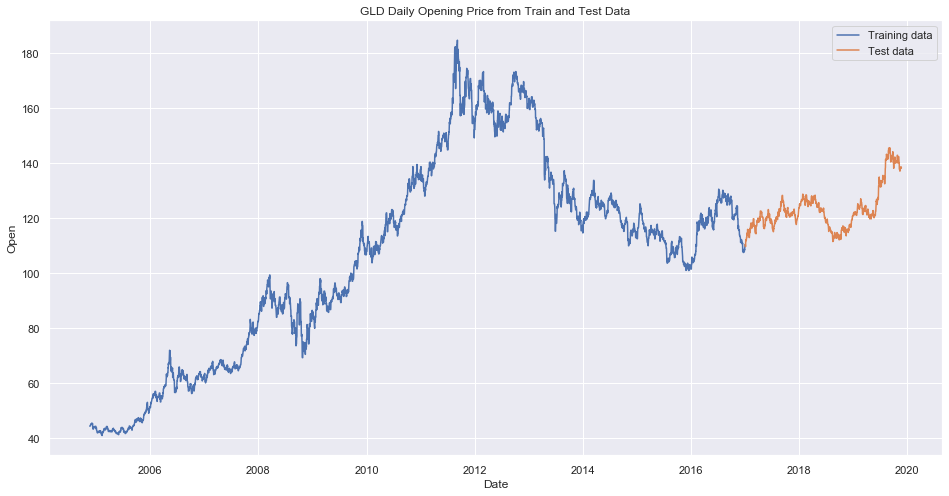

In [151]:
# Plot the test and train data
plt.figure(figsize=(16,8))
sns.lineplot(x=train_data.index, y='Open', data=train_data, linewidth=1.5, label='Training data').set_title('GLD Daily Opening Price from Train and Test Data')
sns.lineplot(x=test_data.index, y='Open', data=test_data, linewidth=1.5, label='Test data')
plt.show()

# Method 1: ARIMA Model with No Seasonality & One-Step Ahead Forecast

# Fit the Model With These Parameters
We start by comparing predicted values to real values of the time series, which will help us understand the accuracy of our forecasts.

When we forecast differenced time series, we end up with forecasted data of the difference. We have to use the difference to reverse engineer in order to derive the forecasted price. However, we can use ARIMA model to avoid all the work! It takes care of the reverse engineering part automatically!

### ARIMA Model - Autoregressive Integrated Moving Average
model = SARIMAX(df, order = (p,d,q))
- p = number of autoregressive lags
- d = order of differencing
- q = number of moving average lags

Based on previous findings, the order = (p,d,q) should be:
- Difference = 2
- p = 0
- q = 1

When using ARIMA, the forecasted data is the actual forecated price, not the difference.

In [166]:
# Fit a model
model = SARIMAX(train_data['Open'], order=(0,2,1), trend= 'c')
results = model.fit()

# Make predictions for the last 365 days of the train data
# dynamic=False ensures we produce one-step ahead forecasts, forecasts at each point are generated using the full history up to that point
# start=-365, we want to start the prediction from one year back (365 days)
pred_365_traindata = results.get_prediction(start=-365, dynamic=False)

# Forecast mean for these 365 days
pred_mean_365_traindata = pred_365_traindata.predicted_mean

# Get confidence intervals of forecast
confidence_intervals = pred_365_traindata.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower Open']
upper_limits = confidence_intervals.loc[:,'upper Open']

In [167]:
print(pred_mean_365_traindata)

2016-01-02    101.448545
2016-01-03    101.448531
2016-01-04    101.448517
2016-01-05    103.098930
2016-01-06    103.098915
                 ...    
2016-12-27    107.805069
2016-12-28    108.575248
2016-12-29    108.365184
2016-12-30    109.195373
2016-12-31    110.345634
Freq: D, Length: 365, dtype: float64


In [168]:
# Convert pred_mean_365_traindata series to a dataframe
# Inspect pred_mean_365_traindata_df
pred_mean_365_traindata_df = pred_mean_365_traindata.to_frame(name='forecasted_mean')
pred_mean_365_traindata_df.head()

forecasted_mean
2016-01-02       101.448545
2016-01-03       101.448531
2016-01-04       101.448517
2016-01-05       103.098930
2016-01-06       103.098915

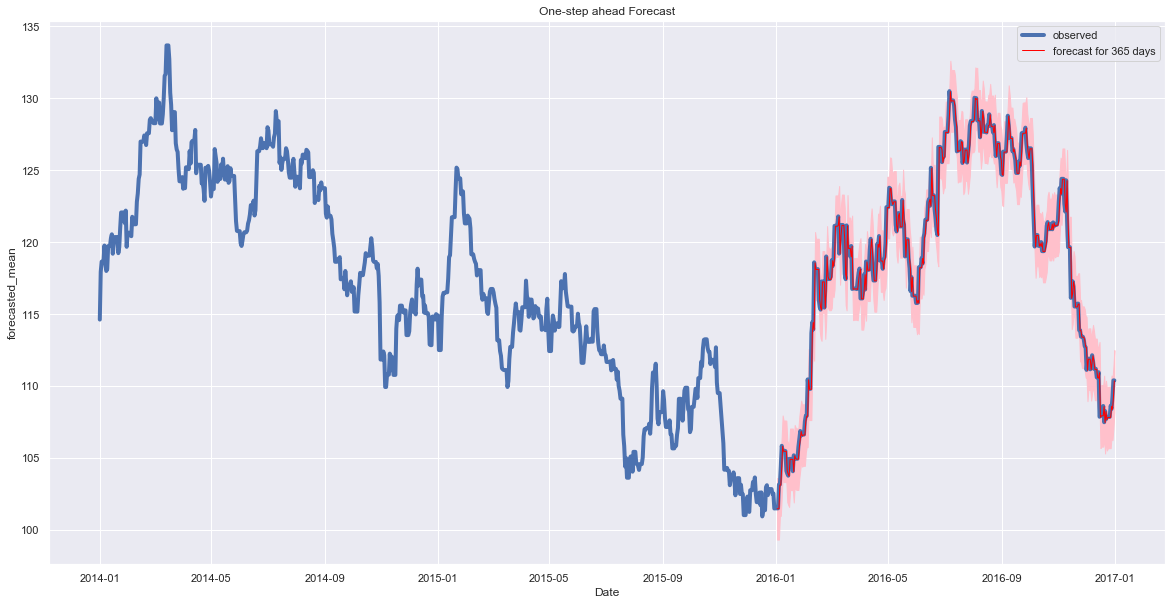

In [169]:
# Plot the original training data - Zoom in starting from 2014
plt.figure(figsize=(20,10))
sns.lineplot(x=train_data['2014-01-01 00:00:00':].index, y='Open', data=train_data['2014-01-01 00:00:00':], linewidth=4, label='observed').set_title('One-step ahead Forecast')

# Plot the mean predictions for the last 365 days of training data
sns.lineplot(x=pred_mean_365_traindata_df.index, y=pred_mean_365_traindata_df['forecasted_mean'], data=pred_mean_365_traindata_df, linewidth=1, label='forecast for 365 days', color='red')

# Shade the area between the confidence intervals
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')


Overall, the above forecasts align with the true values very well for the last 365 days of the training data and it falls within the confidence intervals.

# Method 1: Model Diagnostics
Evaluate the quality of the model before using it for forecasting in production.

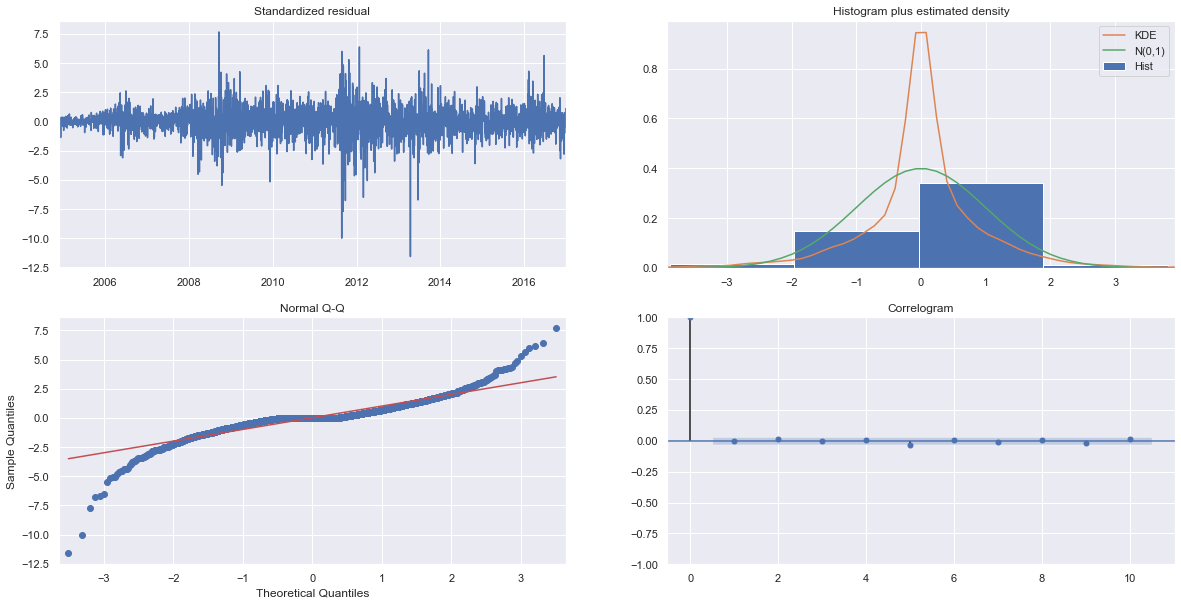

In [170]:
# Create the 4 diagnostic plots
results.plot_diagnostics()
plt.show()

In [171]:
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                   Open   No. Observations:                 4427
Model:               SARIMAX(0, 2, 1)   Log Likelihood               -6674.854
Date:                Wed, 27 Nov 2019   AIC                          13355.709
Time:                        10:20:08   BIC                          13374.894
Sample:                    11-18-2004   HQIC                         13362.474
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.231e-05   1.53e-05     -1.457      0.145   -5.23e-05     7.7e-06
ma.L1         -0.9999      0.004   -259.993      0.000      -1.007      -0.992
sigma2         1.1937      0.011    109.317      0.0

# MAE, MSE, RMSE Calculations

- **Mean Absolute Error** - Measures the average magnitude of the errors in a set of forecasts, without considering their direction. It measures accuracy for continuous variables. Lower values are better, 0 is best.

- **Mean Squared Error (MSE)** - the average squared difference between the estimated values and what is estimated. Measures the quality of an estimator. Smaller the MSE, the closer we are finding the line of best fit.

- **Root Mean Square Error (RMSE)** - similar to MSE, however, the average squared difference between the estimated values and what is estimated. 

In [174]:
# Calculate Mean Absolute Error Between the Predicted Open Prices and the Real Open Prices
residuals = results.resid
mae = np.mean(np.abs(residuals))
print('The Mean Absolute Error of our forecasts is {}'.format(round(mae, 2)))

# Calculate Mean Square Error for periods 2015-08-05 to 2016-12-30 (last 365 days of training data)
pred_mean_365_traindata = pred_365_traindata.predicted_mean
real_values = train_data['2016-01-02':'2016-12-31']['Open']
mse = ((pred_mean_365_traindata - real_values) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Absolute Error of our forecasts is 0.64
The Mean Squared Error of our forecasts is 1.04
The Root Mean Squared Error of our forecasts is 1.02


In [175]:
# Shortcut - Use sklearn metrics library to calculate these metrics.
print('MAE: {}'.format(mean_absolute_error(real_values, pred_mean_365_traindata)))
print('MSE: {}'.format(mean_squared_error(real_values, pred_mean_365_traindata)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(real_values, pred_mean_365_traindata))))

MAE: 0.6362560060525
MSE: 1.0441808073626073
RMSE: 1.0218516562410649


# Method 1 Conclusion: ARIMA Model with No Seasonality & One-Step Ahead Forecast

# Analysis of Diagnostic Results

### Real vs Forecated Value Plot
- the predicted values are align with the real values and the predicted values fall within the confidence interval


### Analysis from the 4 Diagnostic Plots
- **Standardized Residual Plot** - The graph doesn't seem to show a trend. That's what we want.
- **Historgram Plus Estimated Density** - This shows the distribution of the residuals. The green line shows a normal distribution and the orange line needs to be as close to the green line. The 2 lines are very different in this case. This model might need tweaking. 
- **Normal Q-Q** - This shows how the distribution of the residuals compares to a normal distribution. Most of the residuals are on the line except the ends.
- **Correlogram** - ACF plot of the residuals. 95% of the data where lag > 0 should not be significant. That means, they need to be within the blue shaded area. Based on the graph, it looks OK as 95% of the data is not significant, they are within the blue shaded area. 

### Analysis from Summary Results
- Ljung-Box - the null hypothesis states there are no correlations in the residual. If Prob(Q) <= 0.05, then we have to reject the null hypothesis and refit the model. In this case, it's 0.
- Jarque-Bera - the null hypothesis states the residual are normally distributed. If Prob(JB) <= 0.05, then we have to reject the null hypothesis and refit the model. In this case, it's 0.

### MAE, MSE, RMSE (use scklearn metrics)
- MAE: 0.64
- MSE: 1.04
- RMSE: 1.02 - our model forecasted the average daily open price in the training set is within \\$1.02 of the real open prices. \$1 variance in stock price can be considered large.

### In Conclusion:
The analysis above shows that the residuals are correlated and they are not normally distrbuted. This means there is data that the model didn't capture. We need to refit the model. **We may not be able to use this model to make forecasts**.

# Seasonal Time Series
In the previous model, seasonality was not taken into account. Here's we'll investigate if the data is seasonal.

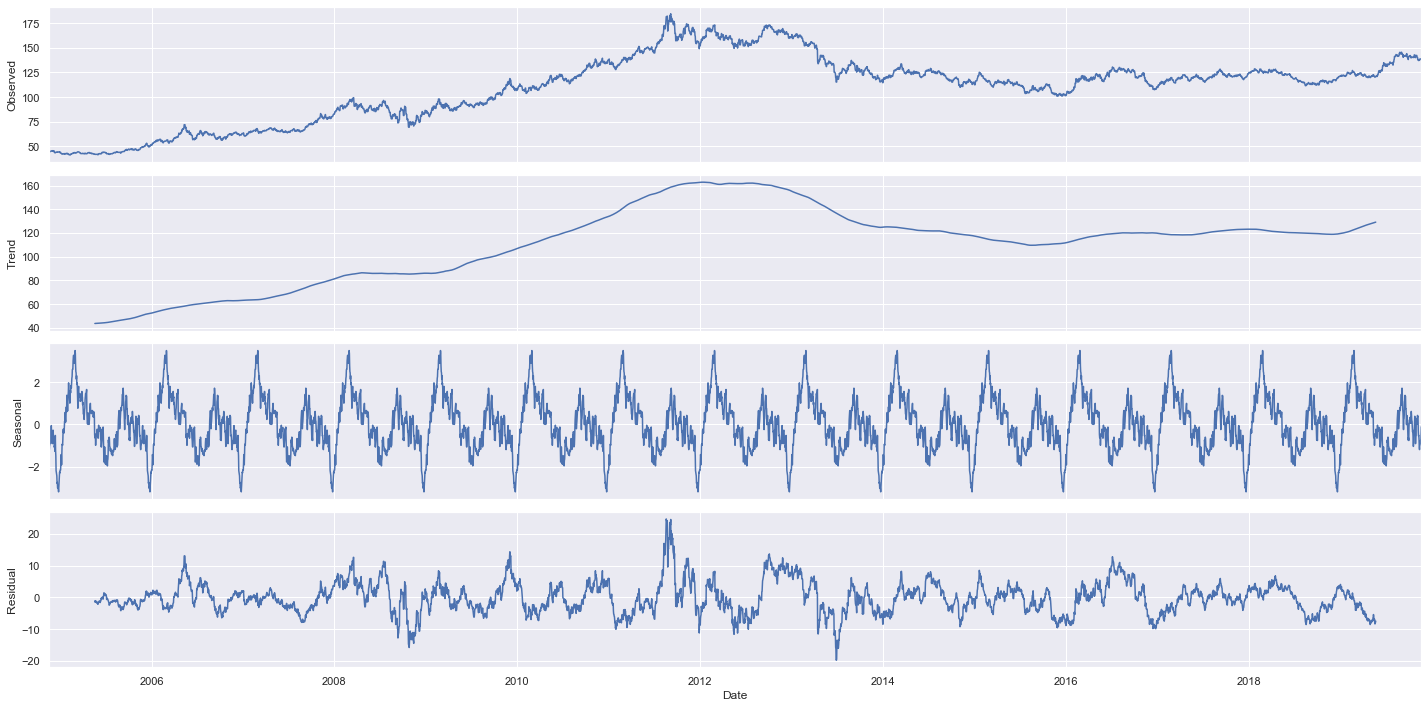

In [181]:
# Use seasonal_decompose to check for seasonal time series
# Additive = Level + Trend + Seasonality + Noise
# Used freq = 365 to represent 365 days in a year

# Had to run this line of code because encountered this error - TypeError: float() argument must be a string or a number, not Period
# This is the solution - Re-registering Pandas converters with"
#pd.plotting.register_matplotlib_converters()

decomp_results = seasonal_decompose(data['Open'], model='additive', freq=365)

# Visualize the data using time-series decomposition
decomp_results.plot()
plt.show()

The plots above shows that the trend in prices of gold is not consistent but there is some obvious seasonality.

# Fitting a SARIMA model with seasonal data

model = SARIMAX(df, order=(p,d,q), seasonal_order(P,D,Q,S))

**Non-seasonal order**
- p: autoregressive order
- d: differencing order
- q: moving average order

**Seasonal order**
- P: seasonal autoregressive order
- D: seasonal differencing order
- Q: seasonal moving average order
- S: number of time steps per cycle

# Method 2:  Auto ARIMA Model with Seasonality & One-Step Ahead Forecast

In [249]:
# In order to use Auto Arima (it's like an automatic grid search to discover the optimal order for an ARIMA model), data needs to be univariate series. We only need 1 column. 
# Source: http://www.alkaline-ml.com/pmdarima/0.9.0/modules/generated/pyramid.arima.auto_arima.html
arima_data = data.drop(columns=['High', 'Low', 'Close', 'Adj Close', 'Volume'])
arima_data.head()

Open
Date                 
2004-11-18  44.430000
2004-11-19  44.490002
2004-11-20  44.490002
2004-11-21  44.490002
2004-11-22  44.750000

In [189]:
# Reference - http://www.alkaline-ml.com/pmdarima/0.9.0/modules/generated/pyramid.arima.auto_arima.html
# m = number of observations per seasonal cycle, 7-daily, 12-monthly, 52-weekly
# Seasonal = True by default
# Stationary = False by default

results = auto_arima(arima_data,
                    seasonal=True,
                    start_p = 1,
                    start_q = 1,
                    #max_p = 3,
                    #max_q = 3,
                    start_P=1,
                    start_Q=1,
                    max_P=3,
                    max_Q=3,
                    m=7, #seasonal period
                    information_criterion='aic',
                    trace=True,
                    error_action='ignore',
                    stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=15867.686, BIC=15907.342, Fit time=5.081 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=15863.338, BIC=15876.556, Fit time=0.108 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=15867.013, BIC=15893.450, Fit time=0.644 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=15867.006, BIC=15893.443, Fit time=0.662 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=15865.125, BIC=15884.953, Fit time=0.346 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 7); AIC=15865.116, BIC=15884.944, Fit time=0.453 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 7); AIC=15864.747, BIC=15891.183, Fit time=2.706 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=15865.223, BIC=15885.050, Fit time=0.330 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=15865.225, BIC=15885.053, Fit time=0.381 seconds
Fit ARIMA: order=(1

### Best Fit ARIMA
Based on the lowest AIC score, the Best Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7). Auto Arima didn't detect any seasonality and suggested the differencing is ONLY ONCE and not TWICE which we concluded earlier using the Dicky-Fuller test.

In [190]:
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 5483
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -7929.669
Date:                Wed, 27 Nov 2019   AIC                          15863.338
Time:                        10:59:55   BIC                          15876.556
Sample:                             0   HQIC                         15867.949
                               - 5483                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0171      0.014      1.215      0.224      -0.011       0.045
sigma2         1.0567      0.007    146.079      0.000       1.042       1.071
Ljung-Box (Q):                       86.91   Jarque-

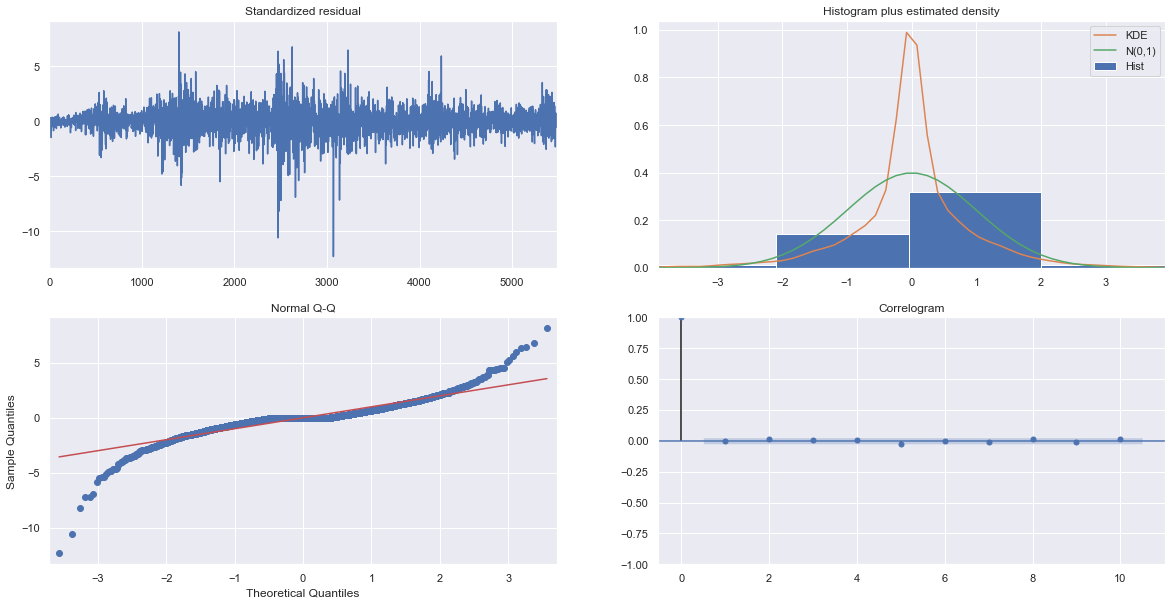

In [191]:
results.plot_diagnostics()
plt.show()

In [192]:
# Based on auto_arima, the Best Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7)
# Split data into training and test sets 
auto_arima_train_data = arima_data.loc[:'2016']
auto_arima_test_data = arima_data.loc['2017':]

# Create a model using auto arima
auto_arima_model = SARIMAX(auto_arima_train_data,
                    seasonal=True,
                    order=(0,1,0),
                    seasonal_order=(0,0,0,7),
                    trend='c')

# Fit the model
auto_arima_results = auto_arima_model.fit() 

# Make predictions for the last 365 days of the train data
# dynamic=False ensures we produce one-step ahead forecasts, forecasts at each point are generated using the full history up to that point
# start=-365, we want to start the prediction from one year back (365 days)
auto_arima_pred_365_traindata = auto_arima_results.get_prediction(start=-365, dynamic=False)

# Forecast mean for 365 days
auto_arima_pred_mean_365_traindata = auto_arima_pred_365_traindata.predicted_mean

# Get confidence intervals of forecast
auto_arima_confidence_intervals = auto_arima_pred_365_traindata.conf_int()

# Select lower and upper confidence limits
auto_arima_lower_limits = auto_arima_confidence_intervals.loc[:,'lower Open']
auto_arima_upper_limits = auto_arima_confidence_intervals.loc[:,'upper Open']

# Convert auto_arima_pred_mean_365_traindata series to a dataframe
# Inspect auto_arima_pred_mean_365_traindata_df
auto_arima_pred_mean_365_traindata_df = auto_arima_pred_mean_365_traindata.to_frame(name='forecasted_mean')
auto_arima_pred_mean_365_traindata_df.head()

forecasted_mean
2016-01-02       101.494904
2016-01-03       101.494904
2016-01-04       101.494904
2016-01-05       103.144898
2016-01-06       103.144898

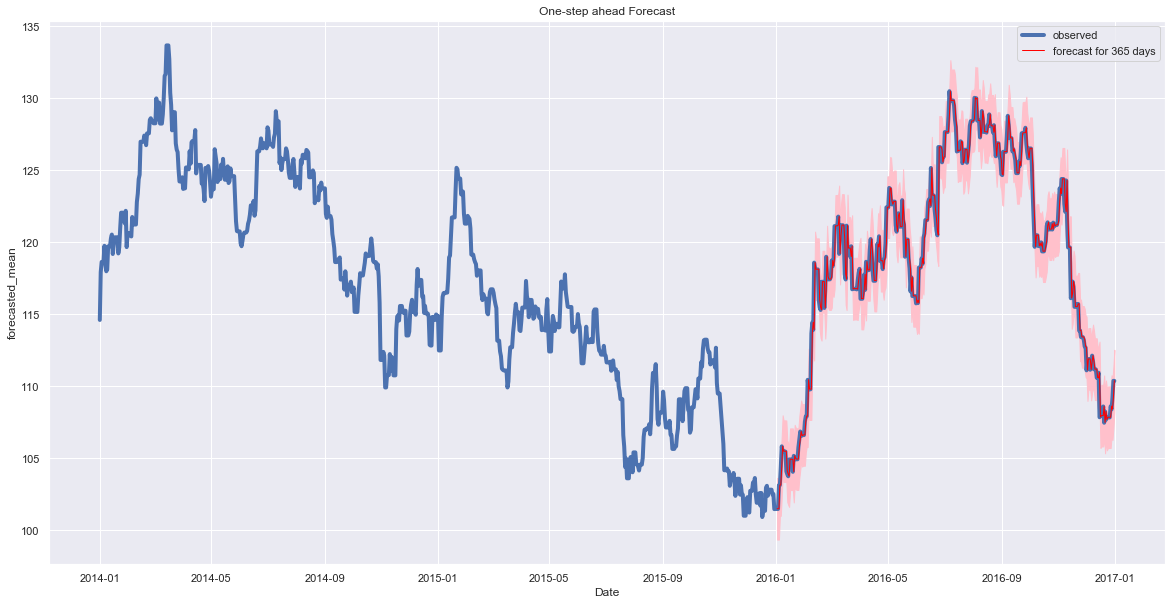

In [194]:
# Plot the origin training data - Zoom in starting from 2014
plt.figure(figsize=(20,10))
sns.lineplot(x=train_data['2014-01-01 00:00:00':].index, y='Open', data=train_data['2014-01-01 00:00:00':], linewidth=4, label='observed').set_title('One-step ahead Forecast')

# Plot the mean predictions
sns.lineplot(x=auto_arima_pred_mean_365_traindata_df.index, y=auto_arima_pred_mean_365_traindata_df['forecasted_mean'], data=auto_arima_pred_mean_365_traindata_df, linewidth=1, label='forecast for 365 days', color='red')

# Shade the area between the confidence intervals
plt.fill_between(auto_arima_lower_limits.index, auto_arima_lower_limits, auto_arima_upper_limits, color='pink')

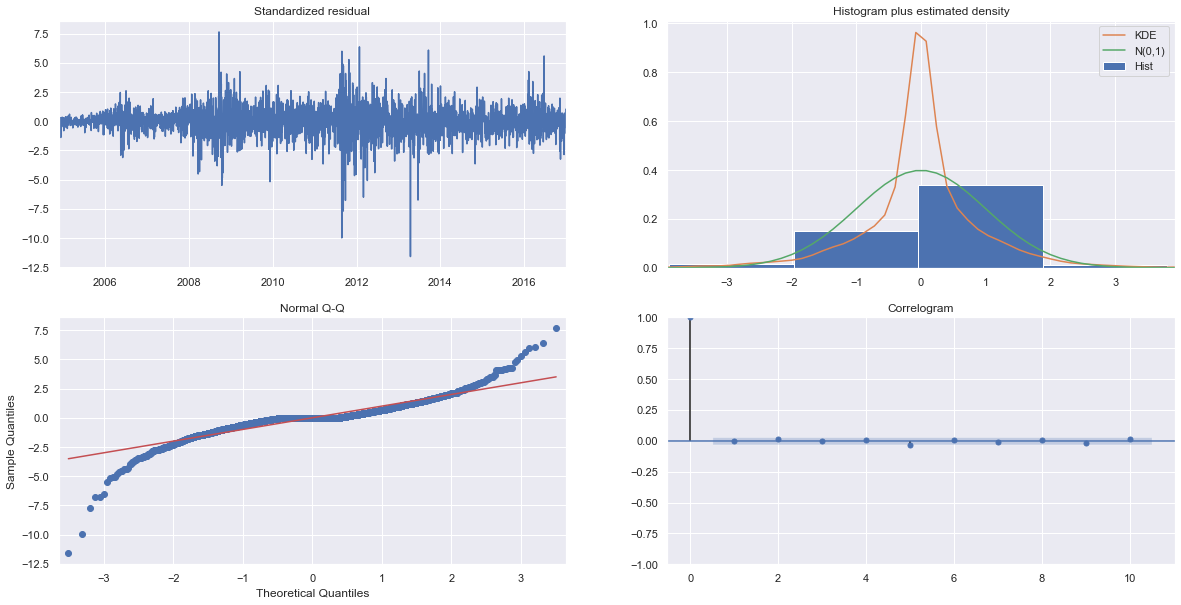

                           Statespace Model Results                           
Dep. Variable:                   Open   No. Observations:                 4427
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6672.507
Date:                Wed, 27 Nov 2019   AIC                          13349.014
Time:                        11:02:21   BIC                          13361.804
Sample:                    11-18-2004   HQIC                         13353.524
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0149      0.017      0.890      0.373      -0.018       0.048
sigma2         1.1939      0.009    127.785      0.000       1.176       1.212
Ljung-Box (Q):                       85.86   Jarque-

In [195]:
# Create the 4 diagnostic plots
auto_arima_results.plot_diagnostics()
plt.show()

# Print the diagnostic summary results
print(auto_arima_results.summary())

# Calculate MAE, MSE, RMSE
print('MAE: {}'.format(mean_absolute_error(real_values, auto_arima_pred_mean_365_traindata)))
print('MSE: {}'.format(mean_squared_error(real_values, auto_arima_pred_mean_365_traindata)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(real_values, auto_arima_pred_mean_365_traindata))))

# Method 2 Conclusion: ARIMA Model with Seasonality & One-Step Ahead Forecast - Using Auto_Arima to do Grid Search

## Analysis of Diagnostic Results

**Method 1:**
- MAE: 0.64
- MSE: 1.04
- RMSE: 1.02


**Method 2:**
- MAE: 0.63
- MSE: 1.04
- RMSE: 1.02

**Conclusion:** Method 2 of MAE performed slightly better than Method 1

# Method 3: ARIMA Model with Seasonality & One-Step Ahead Forecast - Manual Grid Search

In [196]:
# Create a manual grid search
# DO NOT RUN THE FOLLOW 4 CELLS. IT TAKES ABOUT 2 HOURS TO RUN THE GRID SEARCH.
# GRID SEARCH RESULTS ARE STORED IN /data/sarimax_manualgridsearch_results.csv

#------- DO NOT UNCOMMENT UNLESS YOU WANT TO SPEND 1.5 HRS RUNNING THE GRID SEARCH -------#
#p = d = q = range(0, 3)
#pdq = list(itertools.product(p, d, q))
#seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

#print('Examples of parameter combinations for Seasonal ARIMA...')
#print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
#print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 0, 2, 7)
SARIMAX: (0, 0, 2) x (0, 1, 0, 7)
SARIMAX: (0, 0, 2) x (0, 1, 1, 7)


In [197]:
#------- DO NOT UNCOMMENT UNLESS YOU WANT TO SPEND 1.5 HRS RUNNING THE GRID SEARCH -------#
# THE OPTIMAL PARAMTERS FOUND BY THE GRID SEARCH IS => ARIMA(0, 1, 2)x(0, 0, 2, 7)7 - AIC:15834.912278

#params_aic = []

#for param in pdq:
#    for param_seasonal in seasonal_pdq:
#        try:
#            model_test = SARIMAX(arima_data, order=param,
#                                seasonal_order=param_seasonal,
#                                enforce_stationarity=False,
#                                enforce_invertibility=False,
#                                trace=True,
#                                error_action='ignore',
#                                stepwise=True,
#                                seasonal=True)

#            results = model_test.fit()
            
            # store param, param_seasonal and aic results in params_aic list
#            params_aic.append((param, param_seasonal, results.aic))

            #print('ARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results.aic))
            
#        except:
#            continue


In [201]:
# Uncomment this section if the manual grid search is rerun
# Make a dataframe of the parameters and AIC results

#params_aic_df = pd.DataFrame(params_aic, columns=['param', 'param_seasonal', 'results.aic'])
#params_aic_df.sort_values('results.aic').head()

param param_seasonal   results.aic
137  (0, 1, 2)   (0, 0, 2, 7)  15834.912278
83   (0, 1, 0)   (0, 0, 2, 7)  15835.331838
110  (0, 1, 1)   (0, 0, 2, 7)  15835.357451
146  (0, 1, 2)   (1, 0, 2, 7)  15835.854253
119  (0, 1, 1)   (1, 0, 2, 7)  15836.329783

In [202]:
# Uncomment this section if the manual grid search is rerun
# Save params_aic_df into a csv file
#params_aic_df.to_csv('data/sarimax_manualgridsearch_results.csv', index=False)

In [208]:
# Create a model using the optimal parameters found by the manual grid search: ARIMA(2, 1, 2)x(0, 0, 2, 7)7 - AIC:12298.183421032392
manual_arima_model = SARIMAX(auto_arima_train_data,
                    seasonal=True,
                    order=(0,1,2),
                    seasonal_order=(0,0,2,7),
                    trend='c')

# Fit the model
manual_arima_results = manual_arima_model.fit() 

# Make predictions for the last 365 days of the train data
# dynamic=False ensures we produce one-step ahead forecasts, forecasts at each point are generated using the full history up to that point
# start=-365, we want to start the prediction from one year back (365 days)
manual_arima_pred_365_traindata = manual_arima_results.get_prediction(start=-365, dynamic=False)

# Forecast mean for 365 days
manual_arima_pred_mean_365_traindata = manual_arima_pred_365_traindata.predicted_mean

# Get confidence intervals of forecast
manual_arima_confidence_intervals = manual_arima_pred_365_traindata.conf_int()

# Select lower and upper confidence limits
manual_arima_lower_limits = manual_arima_confidence_intervals.loc[:,'lower Open']
manual_arima_upper_limits = manual_arima_confidence_intervals.loc[:,'upper Open']

# Convert manual_arima_pred_mean_365_traindata series to a dataframe
# Inspect manual_arima_pred_mean_365_traindata_df
manual_arima_pred_mean_365_traindata_df = manual_arima_pred_mean_365_traindata.to_frame(name='forecasted_mean')
manual_arima_pred_mean_365_traindata_df.head()

forecasted_mean
2016-01-02       101.494876
2016-01-03       101.495372
2016-01-04       101.470529
2016-01-05       103.137466
2016-01-06       103.184876

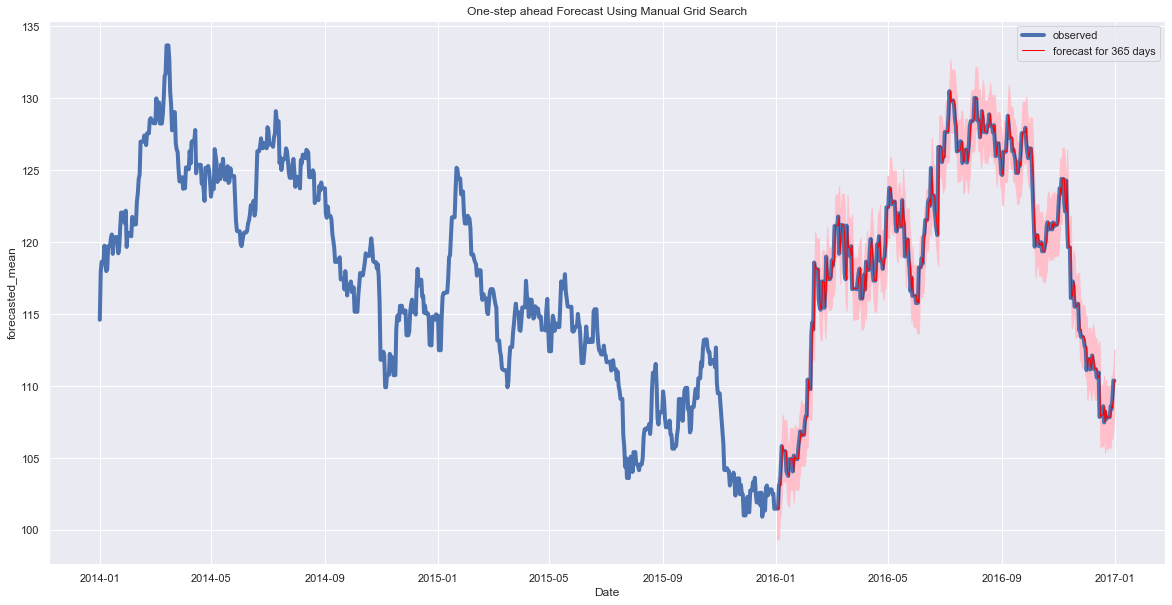

In [209]:
# Plot the origin training data - Zoom in starting from 2014
plt.figure(figsize=(20,10))
sns.lineplot(x=train_data['2014-01-01 00:00:00':].index, y='Open', data=train_data['2014-01-01 00:00:00':], linewidth=4, label='observed').set_title('One-step ahead Forecast Using Manual Grid Search')

# Plot the mean predictions
sns.lineplot(x=manual_arima_pred_mean_365_traindata_df.index, y=manual_arima_pred_mean_365_traindata_df['forecasted_mean'], data=manual_arima_pred_mean_365_traindata_df, linewidth=1, label='forecast for 365 days', color='red')

# Shade the area between the confidence intervals
plt.fill_between(manual_arima_lower_limits.index, manual_arima_lower_limits, manual_arima_upper_limits, color='pink')

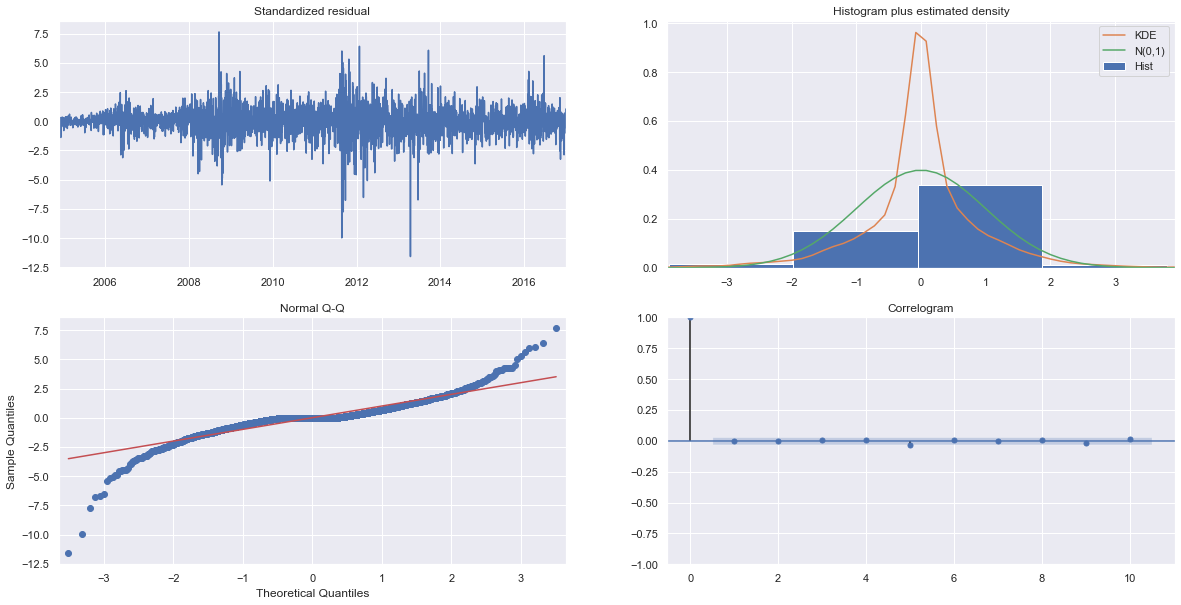

                                 Statespace Model Results                                
Dep. Variable:                              Open   No. Observations:                 4427
Model:             SARIMAX(0, 1, 2)x(0, 0, 2, 7)   Log Likelihood               -6671.364
Date:                           Wed, 27 Nov 2019   AIC                          13354.728
Time:                                   13:30:46   BIC                          13393.099
Sample:                               11-18-2004   HQIC                         13368.260
                                    - 12-31-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0149      0.017      0.892      0.372      -0.018       0.048
ma.L1         -0.0031      0.010     -0.329

In [210]:
# Create the 4 diagnostic plots
manual_arima_results.plot_diagnostics()
plt.show()

# Print the diagnostic summary results
print(manual_arima_results.summary())

# Calculate MAE, MSE, RMSE
print('MAE: {}'.format(mean_absolute_error(real_values, manual_arima_pred_mean_365_traindata)))
print('MSE: {}'.format(mean_squared_error(real_values, manual_arima_pred_mean_365_traindata)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(real_values, manual_arima_pred_mean_365_traindata))))

# Method 3 Conclusion: ARIMA Model with Seasonality & One-Step Ahead Forecast - Using Manual Grid Search

## Analysis of Diagnostic Results

**Method 1: Using AIC/BIC to pick the model order and assume no seasonality**
- MAE: 0.64
- MSE: 1.04
- RMSE: 1.02


**Method 2: Auto Arima**
- MAE: 0.63
- MSE: 1.04
- RMSE: 1.02
    
**Method 3: Manual Grid Search**
- MAE: 0.63
- MSE: 1.04
- RMSE: 1.02

**Conclusion:** There no difference in the results between Auto Arima and Manual Grid Search methods. MAE for Method 2 and 3 is slightly higher than Method 1. We are going to use the Auto Arima method for forecasting of future data.

# Forecast using Training Data and Compare with the Test Data

In [288]:
# Forecasting out of the sample. Use 1056 because that's how many days there are in the test set
auto_arima_forecast = auto_arima_results.get_forecast(steps=len(test_data))

# Forecast mean
auto_arima_mean_forecast = auto_arima_forecast.predicted_mean

# Get confidence intervals of forecast
# Assign it the same index at test data
auto_arima_forecasted_confidence_intervals = auto_arima_forecast.conf_int()
auto_arima_forecasted_confidence_intervals.index = test_data.index #need to do this in order to plot


# Select lower and upper confidence limits
auto_arima_forecasted_lower_limits = auto_arima_forecasted_confidence_intervals.loc[:,'lower Open']
auto_arima_forecasted_upper_limits = auto_arima_forecasted_confidence_intervals.loc[:,'upper Open']

# Convert auto_arima_mean_forecast to a dataframe
# Inspect auto_arima_mean_forecast
auto_arima_mean_forecast_df = auto_arima_mean_forecast.to_frame(name='forecasted_mean')
auto_arima_mean_forecast_df.index = test_data.index
auto_arima_mean_forecast_df.head()

forecasted_mean
Date                       
2017-01-01       110.394898
2017-01-02       110.409798
2017-01-03       110.424699
2017-01-04       110.439599
2017-01-05       110.454500

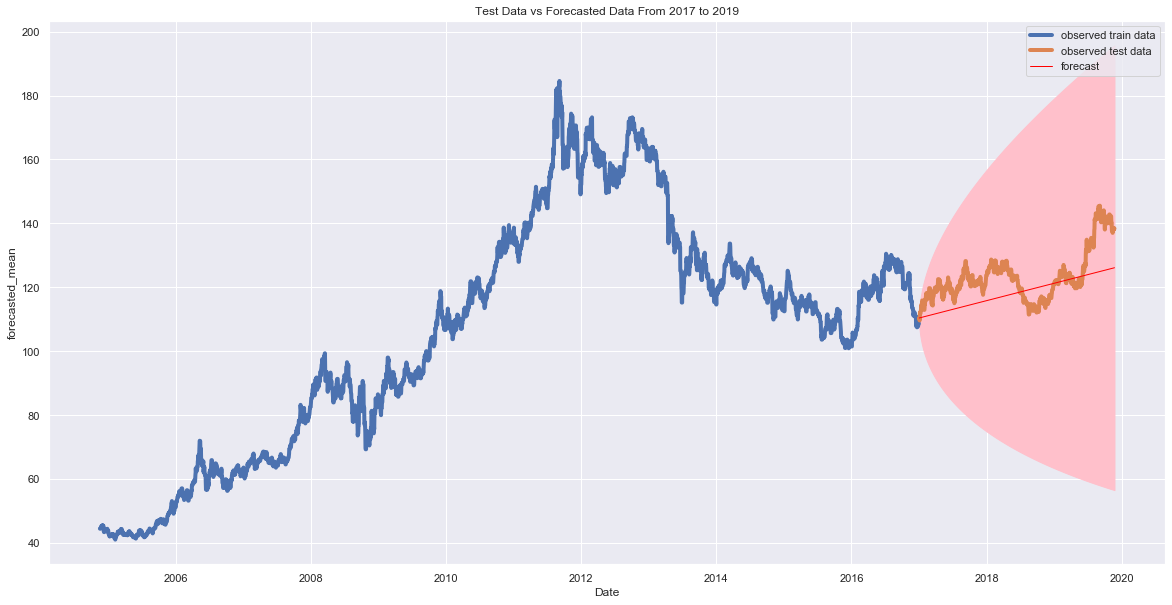

In [289]:
# Plot the forecasted data set against the test data
plt.figure(figsize=(20,10))

# Plot the train data
sns.lineplot(x=train_data.index, y='Open', data=train_data, linewidth=4, label='observed train data').set_title('Test Data vs Forecasted Data From 2017 to 2019')

# Plot the test data
sns.lineplot(x=test_data.index, y='Open', data=test_data, linewidth=4, label='observed test data')

# Plot the forecast data
sns.lineplot(x=auto_arima_mean_forecast_df.index, y=auto_arima_mean_forecast_df['forecasted_mean'], data=auto_arima_mean_forecast_df, linewidth=1, label='forecast', color='red')

# Shade the area between the confidence intervals
plt.fill_between(auto_arima_forecasted_lower_limits.index, auto_arima_forecasted_lower_limits, auto_arima_forecasted_upper_limits, color='pink')

In [213]:
# Calculate MAE, MSE, RMSE
real_test_values = test_data['Open']

# Calculate MAE, MSE, RMSE
print('MAE: {}'.format(mean_absolute_error(real_test_values, auto_arima_mean_forecast)))
print('MSE: {}'.format(mean_squared_error(real_test_values, auto_arima_mean_forecast)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(real_test_values, auto_arima_mean_forecast))))

MAE: 6.69803540881069
MSE: 64.35850259347345
RMSE: 8.022375121712612


# ARIMA Conclusion
By looking at the plot, the forecasted data showed an upward trend which is aligned with the test data. It correctly predicted that Gold Prices will go up from 2017 - 2019. It is also within the confidence interval, however the interval is really large. It's hard to predict the prices of gold but it's able to predict a general trend over time.

# Facebook Prophet
Make sure to install Pystan (pre-requisite) and Prophet. Follow these installation instructions:
- https://pystan.readthedocs.io/en/latest/installation_beginner.html
- https://facebook.github.io/prophet/docs/installation.html

Good resource
- https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [279]:
# For Prophet, we need to create a dataset that is a univariate time series that contains only Open Price. Drop all other columns.
pf_data = data.drop(['High', 'Low', 'Close', 'Adj Close', 'Volume'], axis=1)

#Prophet requires 2 columns with variable names in the time series to be:
#y – Target
#ds – Datetime
pf_data.rename(columns={'Open':'y'}, inplace=True)
pf_data['ds'] = pf_data.index

#Create train and test data sets
pf_train_data = pf_data.loc[:'2016']
pf_test_data = pf_data.loc['2017':]

# Fitting the prophet model
#pf_model = Prophet(changepoint_prior_scale=0.1, daily_seasonality=True)
pf_model = Prophet(daily_seasonality=True)
pf_model.fit(pf_train_data)

#Create future prices & predict prices
pf_future_prices = pf_model.make_future_dataframe(periods=len(pf_test_data)) #1056 days from 1/1/2017 - 11/22/2019, data in the test set 
pf_forecast = pf_model.predict(pf_future_prices)

In [290]:
# Forecast out 1056 days from training data because that's how many days of data we have in the test set
pf_forecast[-(len(pf_test_data)):]

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
4427 2017-01-01  116.281474  106.301631  119.217568   116.281474   116.281474   
4428 2017-01-02  116.281102  106.573841  119.803269   116.281102   116.281102   
4429 2017-01-03  116.280730  106.704463  119.121396   116.280730   116.280730   
4430 2017-01-04  116.280358  106.796941  119.216670   116.280358   116.280358   
4431 2017-01-05  116.279986  107.251551  119.932681   116.279986   116.279986   
...         ...         ...         ...         ...          ...          ...   
5478 2019-11-18  115.890425  -14.356712  240.095814   -12.700636   241.623191   
5479 2019-11-19  115.890053  -14.611624  239.696444   -12.881180   241.745162   
5480 2019-11-20  115.889681  -12.554075  243.246615   -13.061725   241.844236   
5481 2019-11-21  115.889309  -12.468481  238.640514   -13.242270   241.913341   
5482 2019-11-22  115.888937  -15.776876  240.693316   -13.422815   241.980965   

      additive_terms  additive_terms_lower  additive_terms_upper     daily  \
4427       -3.432708             -3.432708             -3.432708  0.028582   
4428       -3.211777             -3.211777             -3.211777  0.028582   
4429       -3.086714             -3.086714             -3.086714  0.028582   
4430       -2.924143             -2.924143             -2.924143  0.028582   
4431       -2.809356             -2.809356             -2.809356  0.028582   
...              ...                   ...                   ...       ...   
5478       -0.882751             -0.882751             -0.882751  0.028582   
5479       -0.910403             -0.910403             -0.910403  0.028582   
5480       -0.909258             -0.909258             -0.909258  0.028582   
5481       -0.962865             -0.962865             -0.962865  0.028582   
5482       -0.951134             -0.951134             -0.951134  0.028582   

      ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
4427  ... -0.040755     -0.040755     -0.040755 -3.420535     -3.420535   
4428  ...  0.048201      0.048201      0.048201 -3.288560     -3.288560   
4429  ...  0.026828      0.026828      0.026828 -3.142125     -3.142125   
4430  ...  0.030743      0.030743      0.030743 -2.983469     -2.983469   
4431  ... -0.022942     -0.022942     -0.022942 -2.814996     -2.814996   
...   ...       ...           ...           ...       ...           ...   
5478  ...  0.048201      0.048201      0.048201 -0.959534     -0.959534   
5479  ...  0.026828      0.026828      0.026828 -0.965814     -0.965814   
5480  ...  0.030743      0.030743      0.030743 -0.968583     -0.968583   
5481  ... -0.022942     -0.022942     -0.022942 -0.968504     -0.968504   
5482  ... -0.013313     -0.013313     -0.013313 -0.966403     -0.966403   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
4427     -3.420535                   0.0                         0.0   
4428     -3.288560                   0.0                         0.0   
4429     -3.142125                   0.0                         0.0   
4430     -2.983469                   0.0                         0.0   
4431     -2.814996                   0.0                         0.0   
...            ...                   ...                         ...   
5478     -0.959534                   0.0                         0.0   
5479     -0.965814                   0.0                         0.0   
5480     -0.968583                   0.0                         0.0   
5481     -0.968504                   0.0                         0.0   
5482     -0.966403                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
4427                         0.0  112.848766  
4428                         0.0  113.069324  
4429                         0.0  113.194015  
4430                         0.0  113.356214  
4431                         0.0  113.470629  
...                          ...         ...  
5478    

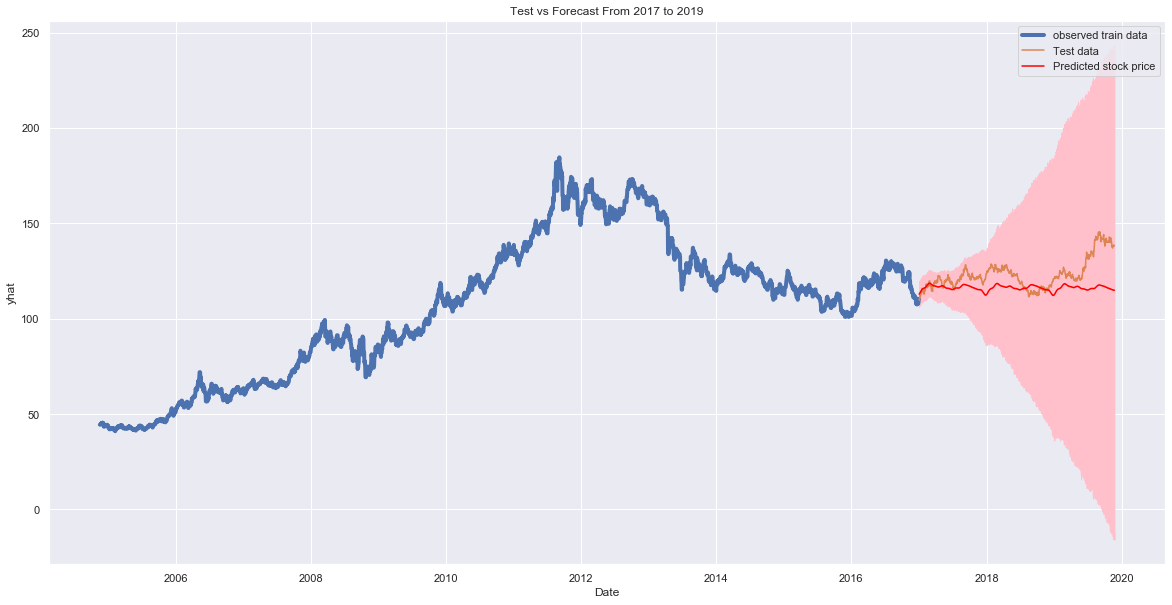

In [291]:
# Plot the forecasted data set against the test data
plt.figure(figsize=(20,10))

# Plot the train data
sns.lineplot(x=train_data.index, y='Open', data=train_data, linewidth=4, label='observed train data').set_title('Test vs Forecast From 2017 to 2019')
sns.lineplot(x=test_data.index, y='Open', data=test_data, linewidth=1.5, label='Test data')
sns.lineplot(x=test_data.index, y=pf_forecast['yhat'][-(len(pf_test_data)):], color='red', label='Predicted stock price')
plt.fill_between(test_data.index, pf_forecast['yhat_lower'][-(len(pf_test_data)):], pf_forecast['yhat_upper'][-(len(pf_test_data)):], color='pink')
plt.show()

In [284]:
# Calculate MAE, MSE, RMSE
real_test_values = test_data['Open']

# Calculate MAE, MSE, RMSE
print('MAE: {}'.format(mean_absolute_error(real_test_values, pf_forecast['yhat'][-(len(pf_test_data)):])))
print('MSE: {}'.format(mean_squared_error(real_test_values, pf_forecast['yhat'][-(len(pf_test_data)):])))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(real_test_values, pf_forecast['yhat'][-(len(pf_test_data)):]))))

MAE: 7.715290860360896
MSE: 108.87818570031648
RMSE: 10.434471031169547


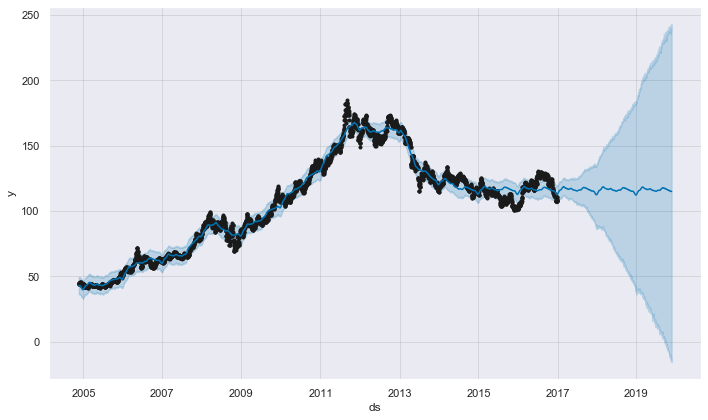

In [285]:
fig1 = pf_model.plot(pf_forecast)

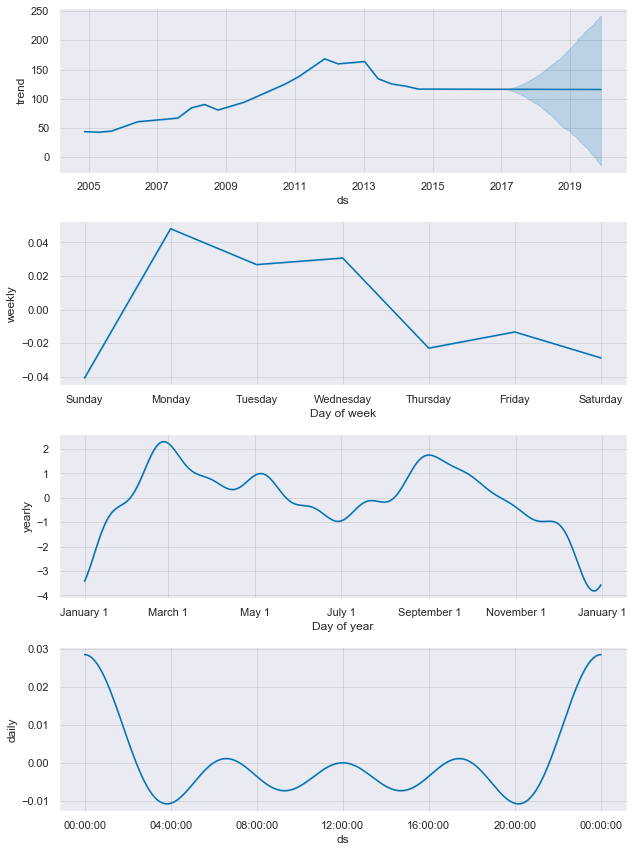

In [286]:
fig2 = pf_model.plot_components(pf_forecast)

In [287]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

plotly_fig = plot_plotly(pf_model, pf_forecast) # this returns a plotly figure
py.iplot(plotly_fig)

# Prophet Conclusion
By looking at the above plots produced by Prophet, the forecasted data shows a flat line. The forecasted data is not aligned with the test data when the test data shows an upward trend. Prophet does not seem to be as accurate as ARIMA model. The MAE, MSE and RMSE of Prophet is also higher than the results of ARIMA model.


# Forecast The Price of Gold For The Next 2 Years
- Having validated our forecast results with our test data, we are going to perform an out of sample forecasting. We have data of gold prices up till 11/22/2019. We are going to forecast the price of gold for the next 2 years, utilizing all the data we have.

# Using Auto Arima to Forecast 2 Years Out

In [292]:
# Create a model using auto arima. Use all the data in the data set
all_auto_arima_model = SARIMAX(arima_data,
                    seasonal=True,
                    order=(0,1,0),
                    seasonal_order=(0,0,0,7),
                    trend='c')

# Fit the model
all_auto_arima_results = all_auto_arima_model.fit() 

# number_of_days_to_forecast
forecast_days = 365 * 2

# Forecasting out of the sample. Use 730 because that's number of days for 2 years
all_auto_arima_forecast = all_auto_arima_results.get_forecast(steps=forecast_days)

# Forecast mean
all_auto_arima_mean_forecast = all_auto_arima_forecast.predicted_mean

# Convert all_auto_arima_mean_forecast to a dataframe
# Inspect all_auto_arima_mean_forecast
all_auto_arima_mean_forecast_df = all_auto_arima_mean_forecast.to_frame(name='forecasted_mean') #date is the index

#delete - all_auto_arima_mean_forecast_df.index = all_auto_arima_mean_forecast_df.index


# Get confidence intervals of forecast
# Assign it the same index at test data
all_auto_arima_forecasted_confidence_intervals = all_auto_arima_forecast.conf_int()
all_auto_arima_forecasted_confidence_intervals.index = all_auto_arima_mean_forecast_df.index #need to do this in order to plot


# Select lower and upper confidence limits
all_auto_arima_forecasted_lower_limits = all_auto_arima_forecasted_confidence_intervals.loc[:,'lower Open']
all_auto_arima_forecasted_upper_limits = all_auto_arima_forecasted_confidence_intervals.loc[:,'upper Open']


all_auto_arima_mean_forecast_df

forecasted_mean
2019-11-23       138.387131
2019-11-24       138.404267
2019-11-25       138.421403
2019-11-26       138.438539
2019-11-27       138.455675
...                     ...
2021-11-17       150.810790
2021-11-18       150.827926
2021-11-19       150.845062
2021-11-20       150.862198
2021-11-21       150.879334

[730 rows x 1 columns]

In [329]:
#Use arima prediction to predict prices for the entire time period of the data set and 2 years out. Entire period is 11/18/2004 - 11/21/2021

# Make sure start and end dates are datetime format
import datetime
start_date = datetime.datetime.strptime("2004-11-18", "%Y-%m-%d")
end_date = datetime.datetime.strptime("2021-11-21", "%Y-%m-%d")

# Use arima prediction
pred_all = all_auto_arima_results.get_prediction(start=start_date, end=end_date, dynamic=False)

# Get predicted means for entire period
all_prediction_from_20041118_to_20211121 = pred_all.predicted_mean

#Convert pred_all series to a dataframe
#Inspect pred_all_df
all_prediction_df = all_prediction_from_20041118_to_20211121.to_frame(name='forecasted_mean')
all_prediction_df.tail()

forecasted_mean
2021-11-17       150.810790
2021-11-18       150.827926
2021-11-19       150.845062
2021-11-20       150.862198
2021-11-21       150.879334

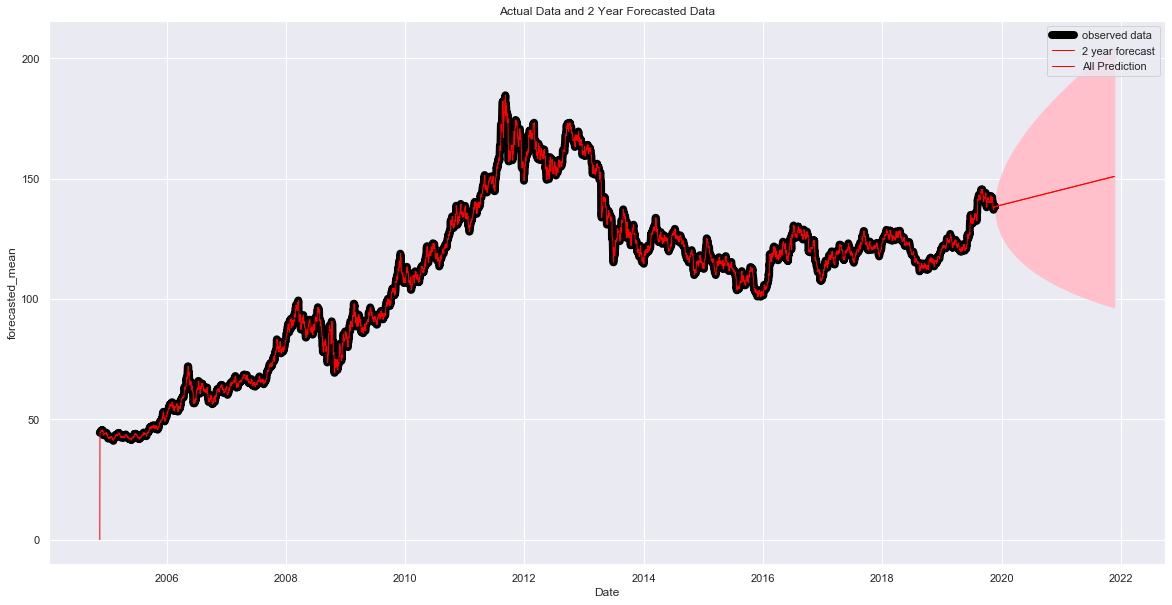

In [331]:
# Plot the original data set and forecasted data 
plt.figure(figsize=(20,10))

# Plot the train data
sns.lineplot(x=data.index, y='Open', data=data, linewidth=8, label='observed data', color='black').set_title('Actual Data and 2 Year Forecasted Data')


# Plot the forecast data
sns.lineplot(x=all_auto_arima_mean_forecast_df.index, y=all_auto_arima_mean_forecast_df['forecasted_mean'], data=all_auto_arima_mean_forecast_df, linewidth=1, label='2 year forecast', color='red')

# Shade the area between the confidence intervals
plt.fill_between(all_auto_arima_forecasted_lower_limits.index, all_auto_arima_forecasted_lower_limits, all_auto_arima_forecasted_upper_limits, color='pink')

# Plot all predictions
sns.lineplot(x=all_prediction_df.index, y=all_prediction_df['forecasted_mean'], data=all_prediction_df, linewidth=1, label='All Prediction', color='red')


### Auto Arima Forecast Results
- The 2 year forecast does does an upward trend in gold prices the next 2 years

# Using Prophet to Forecast 2 Years Out

In [294]:
# Fitting the prophet model
all_pf_model = Prophet(changepoint_prior_scale=0.1, daily_seasonality=True)
all_pf_model.fit(pf_data)

#Create future prices & predict prices
all_pf_future_prices = all_pf_model.make_future_dataframe(periods=forecast_days)  
all_pf_forecast = all_pf_model.predict(all_pf_future_prices)

In [295]:
all_pf_forecast

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2004-11-18   43.827516   38.504496   49.767929    43.827516    43.827516   
1    2004-11-19   43.820135   38.706851   50.080663    43.820135    43.820135   
2    2004-11-20   43.812754   38.884051   50.722816    43.812754    43.812754   
3    2004-11-21   43.805373   38.383239   49.592508    43.805373    43.805373   
4    2004-11-22   43.797992   38.642556   50.001302    43.797992    43.797992   
...         ...         ...         ...         ...          ...          ...   
6208 2021-11-17  139.703475   44.472572  239.835907    44.040299   239.116106   
6209 2021-11-18  139.716528   44.786309  240.863088    44.034753   239.391096   
6210 2021-11-19  139.729580   44.525005  240.755015    44.029206   239.666085   
6211 2021-11-20  139.742633   42.800292  240.852464    44.023660   240.326460   
6212 2021-11-21  139.755685   45.512914  241.298468    44.018113   241.039151   

      additive_terms  additive_terms_lower  additive_terms_upper     daily  \
0           0.492445              0.492445              0.492445  0.026674   
1           0.476207              0.476207              0.476207  0.026674   
2           0.423233              0.423233              0.423233  0.026674   
3           0.380481              0.380481              0.380481  0.026674   
4           0.420955              0.420955              0.420955  0.026674   
...              ...                   ...                   ...       ...   
6208        0.573251              0.573251              0.573251  0.026674   
6209        0.499901              0.499901              0.499901  0.026674   
6210        0.483256              0.483256              0.483256  0.026674   
6211        0.430010              0.430010              0.430010  0.026674   
6212        0.387150              0.387150              0.387150  0.026674   

      ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0     ... -0.010165     -0.010165     -0.010165  0.475936      0.475936   
1     ...  0.002366      0.002366      0.002366  0.447166      0.447166   
2     ... -0.023138     -0.023138     -0.023138  0.419697      0.419697   
3     ... -0.039107     -0.039107     -0.039107  0.392915      0.392915   
4     ...  0.028183      0.028183      0.028183  0.366098      0.366098   
...   ...       ...           ...           ...       ...           ...   
6208  ...  0.032113      0.032113      0.032113  0.514464      0.514464   
6209  ... -0.010165     -0.010165     -0.010165  0.483392      0.483392   
6210  ...  0.002366      0.002366      0.002366  0.454216      0.454216   
6211  ... -0.023138     -0.023138     -0.023138  0.426474      0.426474   
6212  ... -0.039107     -0.039107     -0.039107  0.399583      0.399583   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0         0.475936                   0.0                         0.0   
1         0.447166                   0.0                         0.0   
2         0.419697                   0.0                         0.0   
3         0.392915                   0.0                         0.0   
4         0.366098                   0.0                         0.0   
...            ...                   ...                         ...   
6208      0.514464                   0.0                         0.0   
6209      0.483392                   0.0                         0.0   
6210      0.454216                   0.0                         0.0   
6211      0.426474                   0.0                         0.0   
6212      0.399583                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
0                            0.0   44.319961  
1                            0.0   44.296342  
2                            0.0   44.235987  
3                            0.0   44.185854  
4                            0.0   44.218947  
...                          ...         ...  
6208    

In [296]:
all_plotly_fig = plot_plotly(all_pf_model, all_pf_forecast) # this returns a plotly figure
py.iplot(all_plotly_fig)

# 2 Year Forecast Conclusion
The ARIMA model shows an upward trend in gold prices for the next 2 years, forecasting the price of gold to be at \\$150.80 by 11/21/2021. That's 9.28% increase from today's price of $138. 

Prophet forecasted the price of gold 2 years from now to be at \\$140.14, that's 1.55% increase. It shows a very slight upward trend.

Both models do show an upward trend in gold prices in the next 2 years.